In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
reviews = pd.read_csv('amazon_cells_labelled.txt',delimiter= '\t', header=None)

In [3]:
reviews.columns = ['Review', 'Pos or Neg']

In [4]:
reviews.head()

,Review,Pos or Neg
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [5]:
keywords = ['good', 'excellent', 'awesome', 'great','fantastic']

for key in keywords:
    reviews[str(key)] = reviews.Review.str.contains(' ' + str(key) + ' ', case=False)

Chose good, excellent, awesome, great and fantastic as a starting point for positive reviews

In [6]:
reviews.head()

,Review,Pos or Neg,good,excellent,awesome,great,fantastic
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False


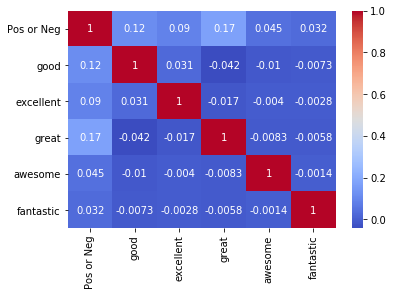

In [50]:
sns.heatmap(reviews.corr(), cmap='coolwarm', annot=True)

The features are pretty much uncorrelated, so the assumptions of the model are valid

In [25]:
data = reviews.drop(['Pos or Neg','Review'],axis=1)

In [14]:
target= reviews['Pos or Neg']

Creating a Naive Bayes model, importing the Bernoulli class since our target data is binary

In [18]:
from sklearn.naive_bayes import BernoulliNB

In [16]:
bnb = BernoulliNB()

In [17]:
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [18]:
y_pred = bnb.predict(data)

In [19]:
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 433


56.7% accuracy with those keywords, not very good but will try with another dataset

In [3]:
yelp_reviews = pd.read_csv('yelp_labelled.txt',delimiter= '\t', header=None)

In [4]:
yelp_reviews.head()

,0,1
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
yelp_reviews.columns = ['Review', 'Pos or Neg']

In [20]:
for key in keywords:
    yelp_reviews[str(key)] = yelp_reviews.Review.str.contains(' ' + str(key) + ' ', case=False)

In [21]:
yelp_reviews.head()

,Review,Pos or Neg,good,excellent,awesome,great,fantastic
0,Wow... Loved this place.,1,False,False,False,False,False
1,Crust is not good.,0,False,False,False,False,False
2,Not tasty and the texture was just nasty.,0,False,False,False,False,False
3,Stopped by during the late May bank holiday of...,1,False,False,False,False,False
4,The selection on the menu was great and so wer...,1,False,False,False,True,False


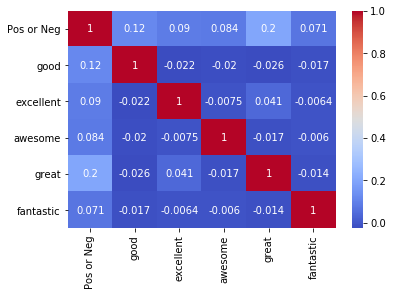

In [22]:
sns.heatmap(yelp_reviews.corr(), annot=True, cmap='coolwarm')

Correlations are low on this set as well, so the model is good to go

In [24]:
yelp_data = yelp_reviews.drop(['Pos or Neg','Review'],axis=1)

In [26]:
yelp_target= yelp_reviews['Pos or Neg']

In [27]:
bnb.fit(yelp_data, yelp_target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [28]:
yelp_y_pred = bnb.predict(yelp_data)

In [29]:
print("Number of mislabeled points out of a total {} points : {}".format(yelp_data.shape[0], (yelp_target != yelp_y_pred).sum()))

Number of mislabeled points out of a total 1000 points : 416


Slightly better accuracy of 58.4%, but it could be improved with a longer and more appropiate list of keywords

In [32]:
#Manual Confusion Matrix
i=0
positive_positive = 0
positive_negative = 0
negative_positive = 0
negative_negative = 0
for prediction in y_pred:
    if target[i] == True and prediction == True:
        negative_negative+=1
    if target[i] == True and prediction == False:
        negative_positive+=1
    if target[i] == False and prediction == True:
        positive_negative+=1
    if target[i] == False and prediction == False:
        positive_positive+=1       
    i+=1
print (positive_positive,positive_negative)
print(negative_positive,negative_negative)

487 13
420 80


Now on to improving the model before applying sample and cross validation
First step is to add more words and hopefully improve accuracy

In [7]:
keywords = ['amazing','enjoy','love','perfect','best','happy','terrific']

for key in keywords:
    reviews[str(key)] = reviews.Review.str.contains(' ' + str(key) + ' ', case=False)

In [8]:
reviews.head()

,Review,Pos or Neg,good,excellent,awesome,great,fantastic,amazing,enjoy,love,perfect,best,happy,terrific
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,True,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,False,False,False,False


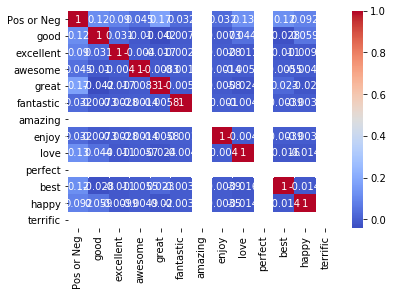

In [10]:
sns.heatmap(reviews.corr(), annot=True, cmap='coolwarm')

Removing amazing, terrific and perfect, since they dont come up at all

In [36]:
reviews.drop('terrific', axis =1, inplace=True)

In [15]:
sns.set(style = "whitegrid", rc = {"figure.figsize": (10, 8)})

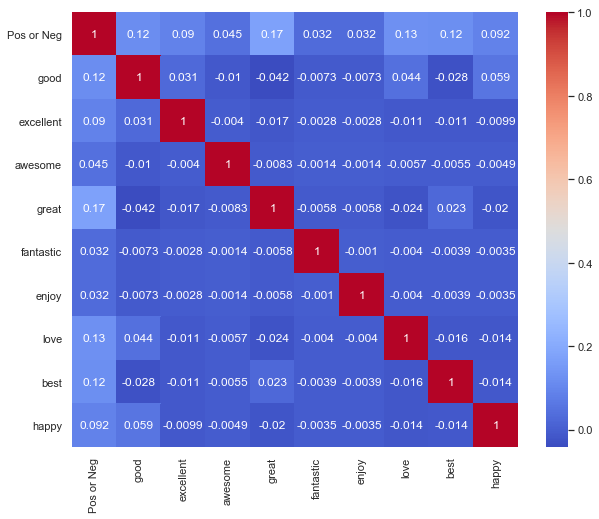

In [37]:
sns.heatmap(reviews.corr(), annot=True, cmap='coolwarm')

Correlations are low, we are good to go

In [38]:
bnb = BernoulliNB()
data = reviews.drop(['Pos or Neg','Review'],axis=1)
target= reviews['Pos or Neg']
bnb.fit(data, target)
y_pred = bnb.predict(data)
print("Number of mislabeled points out of a total {} points : {}".format(data.shape[0], (target != y_pred).sum()))
print('Accuracy: {}%'.format(100*(1000-(target != y_pred).sum())/data.shape[0]))

Number of mislabeled points out of a total 1000 points : 396
Accuracy: 60.4%


Better accuracy, but still low.

Now on to sample validation

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=20)
print('With 20% Holdout: ' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))
print('Testing on Sample: ' + str(bnb.fit(data, target).score(data, target)))

With 20% Holdout: 0.61
Testing on Sample: 0.604


Scores are practically identical, so doesn't seem to be any overfitting going on.
Next is cross validation

In [40]:
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=20)

array([0.6 , 0.62, 0.58, 0.6 , 0.6 , 0.64, 0.6 , 0.58, 0.6 , 0.62, 0.6 ,
       0.62, 0.58, 0.62, 0.62, 0.56, 0.62, 0.62, 0.54, 0.58])

Most scores hover in the range 0.58-0.62 right around the accuracy originally calculated, but two of them fall below that range, to 0.56 and 0.54. Not sure if these are signs of overfitting

In [44]:
features = reviews.drop('Review',axis=1)
features_corr = features.corr()
features[features.columns[:]].corr()['Pos or Neg'][:].sort_values(ascending=False)

Pos or Neg    1.000000
great         0.173537
love          0.127515
best          0.123404
good          0.119296
happy         0.091840
excellent     0.089803
awesome       0.044766
enjoy         0.031639
fantastic     0.031639
Name: Pos or Neg, dtype: float64

The most useful feature was great, followed by love, best and good. At the bottom are enjoy and fantastic with a correlation about 6 times lower than great

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[486,  14],
       [382, 118]])

In [45]:
print('Sensitivity: {}'.format(486/(486+382)))
print('Specificity: {}'.format(118/(118+14)))

Sensitivity: 0.5599078341013825
Specificity: 0.8939393939393939
